In [2]:
import legwork
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import astropy.units as u
from astropy.constants import c
from matplotlib.backends.backend_pdf import PdfPages
import matplotlib.ticker as ticker


plt.rcParams["figure.figsize"] = [4.5,3]
plt.rcParams["figure.dpi"] = 300
plt.rc('font', size=10)

In [3]:
def taiji_psd(f):

    p_d = (8e-12 * u.m)**2 * (1 + (2 * u.mHz / f)**4) * (u.Hz)**(-1)
    p_acc = (3e-15 * (u.m) * (u.s)**(-2))**2 * (1 + (0.4 * u.mHz / f)**2) * (1 + (f / (8 * u.mHz))**4) * (u.Hz)**(-1)
    L = 3e9 * u.m
    f_star = c/(2 * np.pi * L)
    factor1 = 10/(3*L**2)
    factor2 = p_d + 2*(1 + (np.cos((f/f_star).si.value))**2) * p_acc / (2 * np.pi *f)**4
    factor3 = 1 + 0.6*((f/f_star))**2
    Sn = factor1 * factor2 * factor3

    a0, a1, a2, a3, a4, a5 = -85.4336, -2.46276, -0.183175, -0.884147, -0.427176, 0.128666
    Sc = np.exp( a0 * (np.log10(f/(u.mHz)))**0 + a1 * (np.log10(f/(u.mHz)))**1 + a2 * (np.log10(f/(u.mHz)))**2 + a3 * (np.log10(f/(u.mHz)))**3 + a4 * (np.log10(f/(u.mHz)))**4 + a5 * (np.log10(f/(u.mHz)))**5 ) * (u.Hz)**(-1)

    return ((Sn + Sc) * f)**(1/2)

In [4]:
def lisa_psd(f):

    p_d = (1.5e-11 * u.m)**2 * (1 + (2 * u.mHz / f)**4) * (u.Hz)**(-1)
    p_acc = (3e-15 * (u.m) * (u.s)**(-2))**2 * (1 + (0.4 * u.mHz / f)**2) * (1 + (f / (8 * u.mHz))**4) * (u.Hz)**(-1)
    L = 2.5e9 * u.m
    f_star = c/(2 * np.pi * L)
    factor1 = 10/(3*L**2)
    factor2 = p_d + 2*(1 + (np.cos((f/f_star).si.value))**2) * p_acc / (2 * np.pi *f)**4
    factor3 = 1 + 0.6*((f/f_star))**2
    Sn = factor1 * factor2 * factor3

    a0, a1, a2, a3, a4, a5 = -85.4336, -2.46276, -0.183175, -0.884147, -0.427176, 0.128666
    Sc = np.exp( a0 * (np.log10(f/(u.mHz)))**0 + a1 * (np.log10(f/(u.mHz)))**1 + a2 * (np.log10(f/(u.mHz)))**2 + a3 * (np.log10(f/(u.mHz)))**3 + a4 * (np.log10(f/(u.mHz)))**4 + a5 * (np.log10(f/(u.mHz)))**5 ) * (u.Hz)**(-1)

    return ((Sn + Sc) * f)**(1/2)

In [5]:
df10 = pd.read_csv("data/hcgwb10.csv")
hgw10 = df10['hc']

df10_2_1200 = pd.read_csv("data/hcgwb10_2_1200.csv")
hgw10_2_1200 = df10_2_1200['hc']

df10_25_1200 = pd.read_csv("data/hcgwb10_2.5_1200.csv")
hgw10_25_1200 = df10_25_1200['hc']

df10_3_1200 = pd.read_csv("data/hcgwb10_3_1200.csv")
hgw10_3_1200 = df10_3_1200['hc']

df10_35_1200 = pd.read_csv("data/hcgwb10_3.5_1200.csv")
hgw10_35_1200 = df10_35_1200['hc']

In [6]:
df40 = pd.read_csv("data/hcgwb40.csv")
hgw40 = df40['hc']
f = df40['f']

df40_2_1200 = pd.read_csv("data/hcgwb40_2_1200.csv")
hgw40_2_1200 = df40_2_1200['hc']

df40_25_1200 = pd.read_csv("data/hcgwb40_2.5_1200.csv")
hgw40_25_1200 = df40_25_1200['hc']

df40_3_1200 = pd.read_csv("data/hcgwb40_3_1200.csv")
hgw40_3_1200 = df40_3_1200['hc']

df40_35_1200 = pd.read_csv("data/hcgwb40_3.5_1200.csv")
hgw40_35_1200 = df40_35_1200['hc']

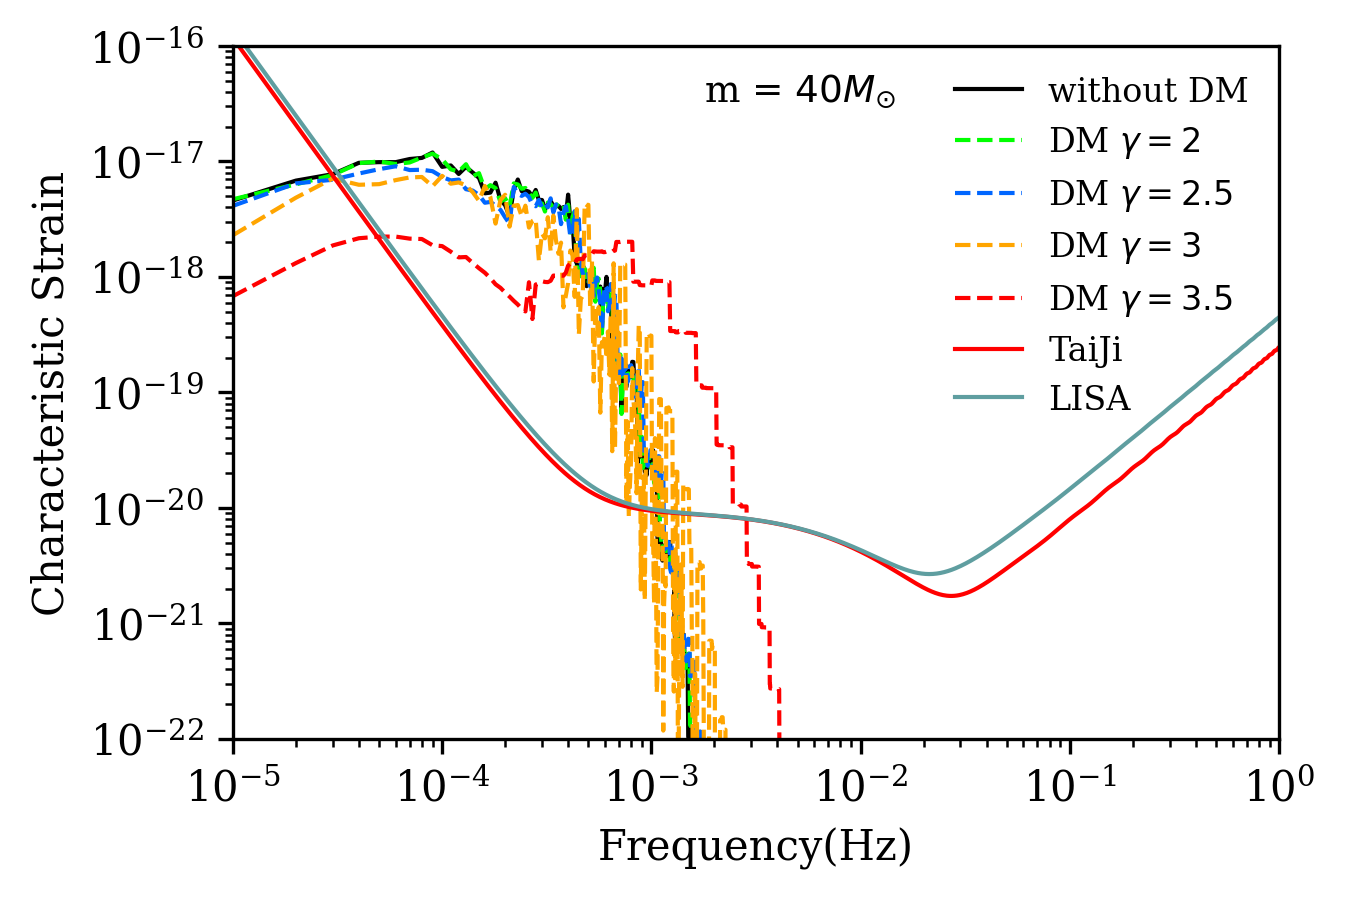

In [7]:
fig, ax = plt.subplots()
fr = np.logspace(-5, 1, 1000) * u.Hz
ax.plot(f,hgw40, linewidth=1,color='k',linestyle='solid', label=r"without DM")
ax.plot(f,hgw40_2_1200, linewidth=1,color='#00FF00',linestyle='dashed', label = r"DM $\gamma = 2$")
ax.plot(f,hgw40_25_1200, linewidth=1,color='#0066FF',linestyle='dashed', label = r"DM $\gamma = 2.5$")
ax.plot(f,hgw40_3_1200, linewidth=1,color='#FFA500',linestyle='dashed', label = r"DM $\gamma = 3$")
ax.plot(f,hgw40_35_1200, linewidth=1,color='#FF0000',linestyle='dashed', label = r"DM $\gamma = 3.5$")
ax.plot(fr,taiji_psd(fr), linewidth=1,color='r',linestyle='solid', label = r"TaiJi")
ax.plot(fr,lisa_psd(fr), linewidth=1,color='#5F9EA0',linestyle='solid', label = r"LISA")

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylabel('Characteristic Strain', fontsize = 10)
ax.set_xlabel('Frequency(Hz)', fontsize = 10)

ax.set_ylim(10**(-22), 10**(-16))
ax.set_xlim(10**(-5), 10**(0))

# ax.grid(True, which="both", ls="--", linewidth=0.5)
ax.set_xticks([10**(-5),10**(-4),10**(-3),10**(-2),10**(-1), 10**(0)])
ax.set_yticks([10**(-22),10**(-21),10**(-20),10**(-19),10**(-18),10**(-17),10**(-16)])

ax = plt.gca()
plt.tick_params(labelsize=10)
ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=10))
ax.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=10))
plt.text(
    x=0.45, y=0.92,  
    s=r'm = $40M_{\odot}$',  
    transform=plt.gca().transAxes,  
    fontsize=9,
)

plt.legend(frameon=False,fontsize=8)
plt.savefig('D:/pyfile/25DMEMRIs/output/hcgwb40.pdf', bbox_inches='tight')
plt.show()

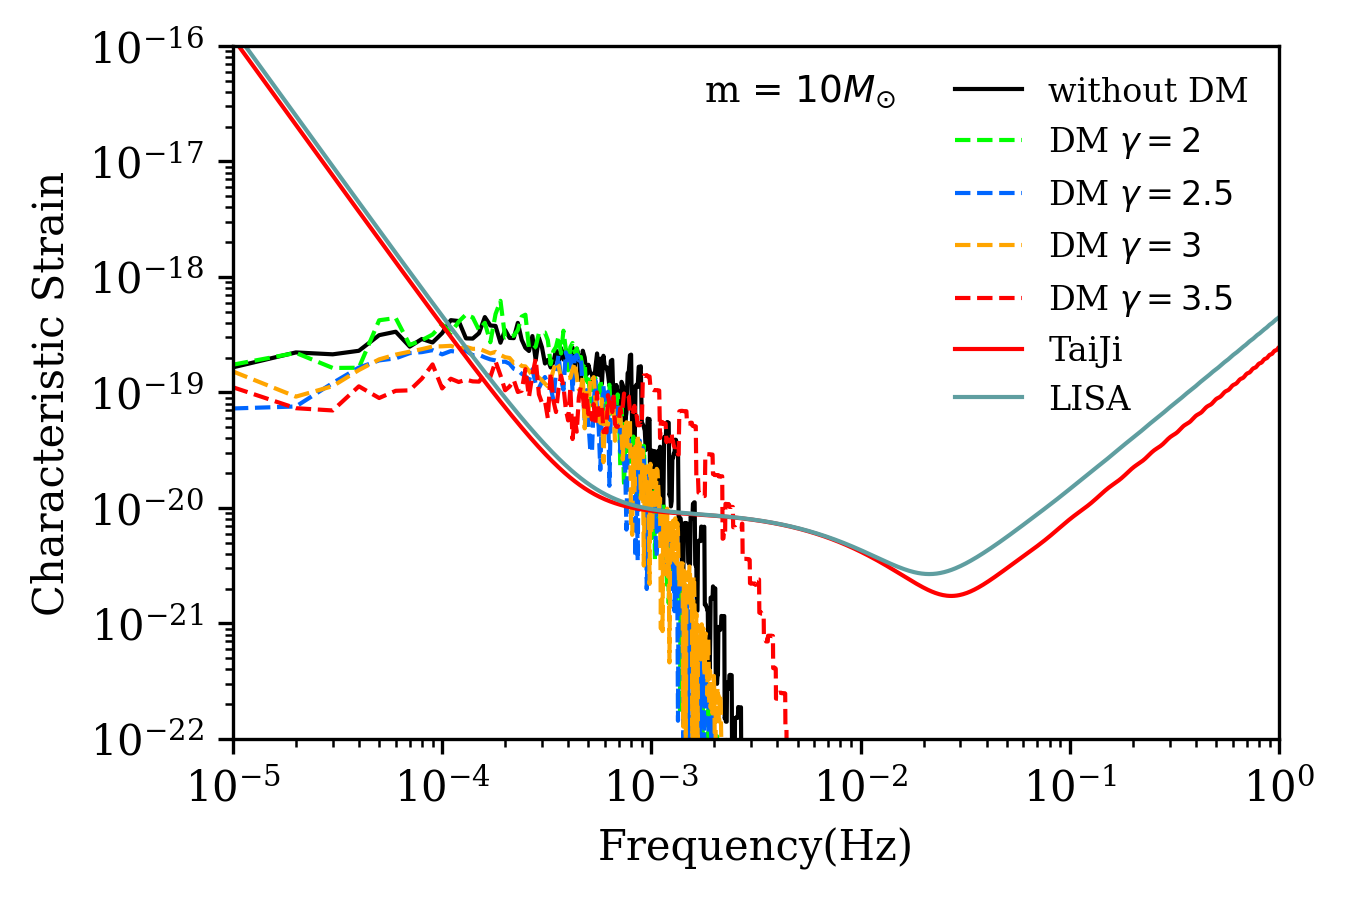

In [8]:
fig, ax = plt.subplots()

ax.plot(f,hgw10, linewidth=1,color='k',linestyle='solid', label=r"without DM")
ax.plot(f,hgw10_2_1200, linewidth=1,color='#00FF00',linestyle='dashed', label = r"DM $\gamma = 2$")
ax.plot(f,hgw10_25_1200, linewidth=1,color='#0066FF',linestyle='dashed', label = r"DM $\gamma = 2.5$")
ax.plot(f,hgw10_3_1200, linewidth=1,color='#FFA500',linestyle='dashed', label = r"DM $\gamma = 3$")
ax.plot(f,hgw10_35_1200, linewidth=1,color='#FF0000',linestyle='dashed', label = r"DM $\gamma = 3.5$")
ax.plot(fr,taiji_psd(fr), linewidth=1,color='r',linestyle='solid', label = r"TaiJi")
ax.plot(fr,lisa_psd(fr), linewidth=1,color='#5F9EA0',linestyle='solid', label = r"LISA")

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylabel('Characteristic Strain', fontsize = 10)
ax.set_xlabel('Frequency(Hz)', fontsize = 10)

ax.set_ylim(10**(-22), 10**(-16))
ax.set_xlim(10**(-5), 10**(0))

# ax.grid(True, which="both", ls="--", linewidth=0.5)
ax.set_xticks([10**(-5),10**(-4),10**(-3),10**(-2),10**(-1), 10**(0)])
ax.set_yticks([10**(-22),10**(-21),10**(-20),10**(-19),10**(-18),10**(-17),10**(-16)])

ax = plt.gca()
plt.tick_params(labelsize=10)
ax.yaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=10))
ax.xaxis.set_minor_locator(ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=10))

plt.text(
    x=0.45, y=0.92,  
    s=r'm = $10M_{\odot}$',  
    transform=plt.gca().transAxes,  
    fontsize=9,
)

plt.legend(frameon=False,loc="upper right",fontsize=8)
plt.savefig('D:/pyfile/25DMEMRIs/output/hcgwb10.pdf', bbox_inches='tight')
plt.show()